In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chisquare
from collections import Counter



# A variavel mega vai guardar a tabela que esta no excel
mega = pd.read_excel("./Mega/dados_update.xlsx")

# A planilha usada para analisar esta na ordem dos sorteios

display(mega)

,Concurso,Data,bola 1,bola 2,bola 3,bola 4,bola 5,bola 6
0,2908,30/08/2025,37,38,20,36,50,35
1,2907,28/08/2025,30,52,33,42,56,44
2,2906,26/08/2025,46,41,49,33,37,17
3,2905,23/08/2025,52,17,4,26,43,18
4,2904,21/08/2025,46,2,38,52,37,55
...,...,...,...,...,...,...,...,...
2903,5,08/04/1996,1,19,46,6,16,2
2904,4,01/04/1996,6,59,42,27,1,5
2905,3,25/03/1996,36,30,10,11,29,47
2906,2,18/03/1996,9,39,37,49,43,41


In [3]:
descricao = mega[['bola 1', 'bola 2', 'bola 3', 'bola 4', 'bola 5', 'bola 6']].describe()
display(descricao)

,bola 1,bola 2,bola 3,bola 4,bola 5,bola 6
count,2865.000000,2865.000000,2865.000000,2865.000000,2865.000000,2865.000000
mean,30.569983,30.201396,30.708202,30.953229,30.506108,30.272949
std,17.245559,17.383177,17.366852,17.279858,17.204307,17.194404
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,16.000000,15.000000,16.000000,16.000000,15.000000,16.000000
50%,31.000000,31.000000,31.000000,31.000000,31.000000,30.000000
75%,46.000000,45.000000,46.000000,46.000000,45.000000,45.000000
max,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000


In [2]:
# Lista com os nomes das colunas das bolas
colunas_bolas = ['bola 1', 'bola 2', 'bola 3', 'bola 4', 'bola 5', 'bola 6']

# Criar um DataFrame vazio para armazenar as frequências individuais
df_freqs = pd.DataFrame()

# Para cada bola, contar as frequências e juntar no DataFrame
for bola in colunas_bolas:
    freq = mega[bola].value_counts().sort_index()
    df_freqs[bola] = freq

# Substitui NaN por 0 (caso algum número não tenha saído em alguma bola)
df_freqs.fillna(0, inplace=True)

# Garante que os valores sejam inteiros
df_freqs = df_freqs.astype(int)

# Adiciona a coluna "total"
df_freqs['total'] = df_freqs.sum(axis=1)

# Ordena pelo número
df_freqs = df_freqs.sort_index()

# Exibe a tabela
display(df_freqs)

,bola 1,bola 2,bola 3,bola 4,bola 5,bola 6,total
bola 1,,,,,,,
1,42,47,55,56,39,44,283
2,56,46,56,43,47,46,294
3,40,55,40,34,48,51,268
4,59,44,55,51,47,49,305
5,52,67,42,51,52,55,319
6,53,53,46,41,48,50,291
7,53,43,41,48,45,41,271
8,41,59,45,44,43,54,286
9,43,45,43,45,54,43,273


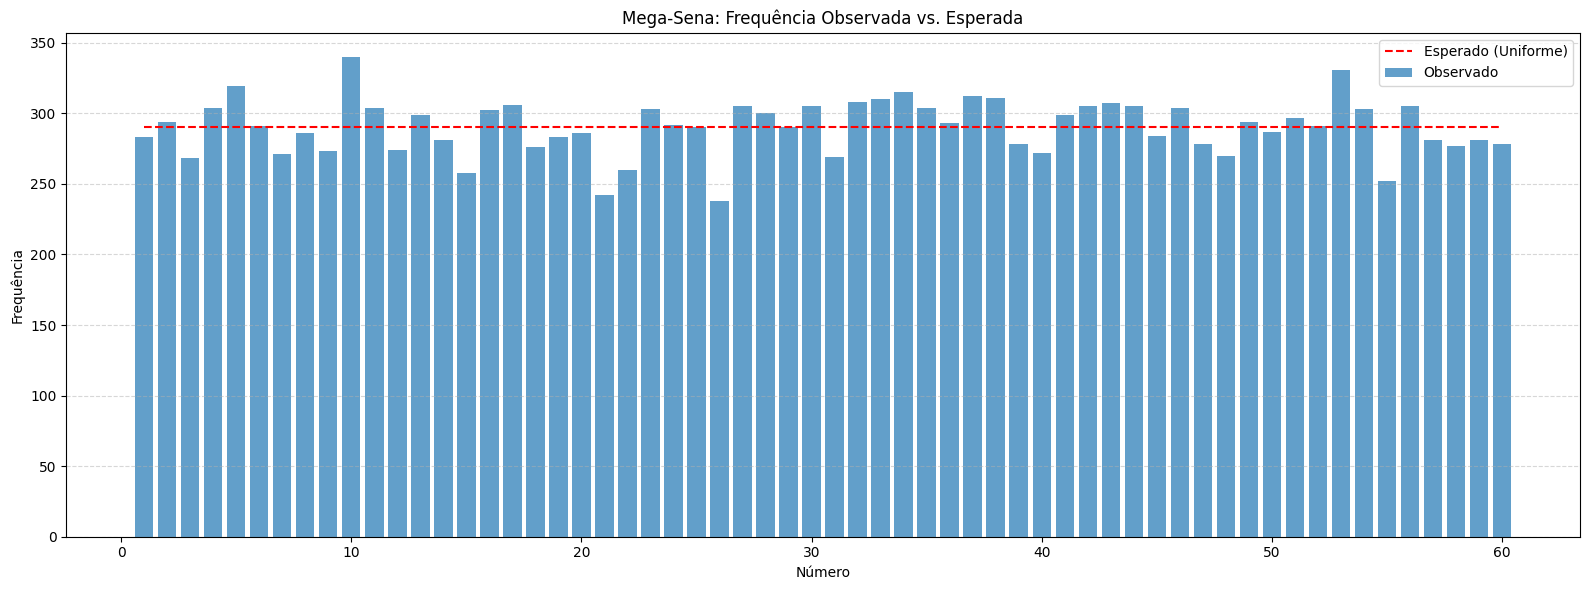

In [6]:
# Dados
observado = df_freqs['total']
esperado = [observado.sum() / len(observado)] * len(observado)  # distribuição uniforme

# Gráfico
plt.figure(figsize=(16, 6))
plt.bar(observado.index, observado, label='Observado', alpha=0.7)
plt.plot(observado.index, esperado, label='Esperado (Uniforme)', color='red', linestyle='--')
plt.xlabel('Número')
plt.ylabel('Frequência')
plt.title('Mega-Sena: Frequência Observada vs. Esperada')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [3]:
numero_mais_frequente = df_freqs['total'].idxmax()
print("Número mais frequente:", numero_mais_frequente)

# Ver todas as linhas onde esse número aparece em qualquer uma das bolas
apareceu_em = mega[
    (mega['bola 1'] == numero_mais_frequente) |
    (mega['bola 2'] == numero_mais_frequente) |
    (mega['bola 3'] == numero_mais_frequente) |
    (mega['bola 4'] == numero_mais_frequente) |
    (mega['bola 5'] == numero_mais_frequente) |
    (mega['bola 6'] == numero_mais_frequente)
]

display(apareceu_em.head(10))

Número mais frequente: 10


,Concurso,Data,bola 1,bola 2,bola 3,bola 4,bola 5,bola 6
9,2899,09/08/2025,28,44,22,42,10,51
15,2893,26/07/2025,10,50,41,45,40,48
23,2885,08/07/2025,56,25,10,28,36,37
39,2869,29/05/2025,2,53,13,41,10,40
40,2868,27/05/2025,10,38,26,22,51,19
52,2856,26/04/2025,10,27,48,3,5,38
63,2845,27/03/2025,40,31,56,52,10,54
72,2836,06/03/2025,30,6,50,1,42,10
82,2826,08/02/2025,20,58,54,10,60,6
90,2818,21/01/2025,7,15,25,47,12,10


In [8]:
# Para cada bola, pega os top 5 números que mais apareceram
top5_por_bola = {}

for bola in colunas_bolas:
    top5 = df_freqs[bola].sort_values(ascending=False).head(5)
    top5_por_bola[bola] = top5

# Mostrar
for bola, top5 in top5_por_bola.items():
    display(f"\nTop 5 números mais frequentes na {bola}:")
    display(top5)

'\nTop 5 números mais frequentes na bola 1:'

bola 1
28    63
35    62
30    60
32    60
46    59
Name: bola 1, dtype: int64

'\nTop 5 números mais frequentes na bola 2:'

bola 1
5     67
10    63
53    62
39    62
32    61
Name: bola 2, dtype: int64

'\nTop 5 números mais frequentes na bola 3:'

bola 1
56    63
27    62
34    61
38    61
41    60
Name: bola 3, dtype: int64

'\nTop 5 números mais frequentes na bola 4:'

bola 1
37    67
60    64
29    61
34    57
1     56
Name: bola 4, dtype: int64

'\nTop 5 números mais frequentes na bola 5:'

bola 1
35    64
10    63
16    61
44    59
45    57
Name: bola 5, dtype: int64

'\nTop 5 números mais frequentes na bola 6:'

bola 1
23    64
33    63
16    58
10    58
53    58
Name: bola 6, dtype: int64